In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
keras.__version__

'2.2.0'

In [3]:
img = image.load_img('/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/training/fully_covered/aadxkoxr.jpg')

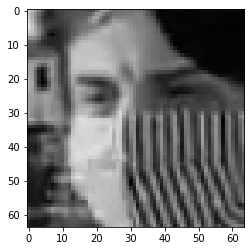

In [4]:
plt.imshow(img)

In [5]:
cv2.imread('/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/training/fully_covered/aadxkoxr.jpg')

array([[[205, 205, 205],
        [184, 184, 184],
        [161, 161, 161],
        ...,
        [  5,   5,   5],
        [  5,   5,   5],
        [  5,   5,   5]],

       [[199, 199, 199],
        [172, 172, 172],
        [141, 141, 141],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       [[208, 208, 208],
        [173, 173, 173],
        [134, 134, 134],
        ...,
        [  4,   4,   4],
        [  4,   4,   4],
        [  4,   4,   4]],

       ...,

       [[ 58,  58,  58],
        [ 41,  41,  41],
        [ 35,  35,  35],
        ...,
        [ 63,  63,  63],
        [ 66,  66,  66],
        [ 86,  86,  86]],

       [[ 34,  34,  34],
        [ 21,  21,  21],
        [ 19,  19,  19],
        ...,
        [ 96,  96,  96],
        [ 73,  73,  73],
        [ 66,  66,  66]],

       [[ 35,  35,  35],
        [ 21,  21,  21],
        [ 17,  17,  17],
        ...,
        [131, 131, 131],
        [117, 117, 117],
        [109, 109, 109]]

In [6]:
cv2.imread('/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/training/fully_covered/aadxkoxr.jpg').shape

(64, 64, 3)

https://www.youtube.com/watch?v=uqomO_BZ44g

fully_covered:

training(984images): from beginning to rzswdffg
validation(186): sakubzkk to vkatkftg
testing(275): vksaecdc to end 


not_covered:

training(2964): from beginning to uvtmpvra
validation(300): uvxcnkcc to xeqgmujj
testing(400): xesbgguc to end

paritally_covered:

training(300):  from beginning to txrkhzve
validation(72): from tyvwunpq to xylefxew
testing(20):  from xymobbkv to end

In [7]:
train_dataset_path = '/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/training'

In [8]:
img_size = 64

In [9]:
batchsize=64

In [10]:
training = ImageDataGenerator(rescale=1/208)
validation = ImageDataGenerator(rescale=1/208)

In [11]:
training_dataset = training.flow_from_directory('/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/training',
                                               target_size=(64,64),
                                               batch_size = batchsize,
                                               class_mode = 'categorical')


Found 5212 images belonging to 3 classes.


In [12]:
validation_dataset = validation.flow_from_directory('/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/validation',
                                               target_size=(64,64),
                                               batch_size = batchsize,
                                               class_mode = 'categorical')


Found 900 images belonging to 3 classes.


In [13]:
training_dataset.class_indices

{'fully_covered': 0, 'not_covered': 1, 'partially_covered': 2}

In [14]:
training_dataset.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [15]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16,(3,3), activation = 'relu', input_shape = (64,64,3)),
                                    tf.keras.layers.MaxPool2D(),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3), activation = 'relu'), 
                                    tf.keras.layers.BatchNormalization(),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3), activation = 'relu'), 
                                    tf.keras.layers.MaxPool2D(), 
                                    #
                                    tf.keras.layers.Conv2D(128,(3,3), activation = 'relu'), 
                                    tf.keras.layers.MaxPool2D(), 
                                    #
                                    tf.keras.layers.Flatten(),
                                    #
                                    tf.keras.layers.Dense(512, activation = 'relu'),
                                    #
                                    tf.keras.layers.Dense(3, activation = 'softmax')])

In [23]:
early_stopping = EarlyStopping(
    monitor="val_accuracy",
    patience=10,
    verbose=0,
    mode="max"
)

In [24]:
model.compile(loss='categorical_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics=['accuracy'])

In [26]:
model_fit = model.fit(training_dataset,
                     steps_per_epoch = 3,
                     epochs = 100,
                     validation_data = validation_dataset,
                     callbacks = [early_stopping])

Epoch 1/100
3/3 [==============================] - 1s 450ms/step - loss: 1.8010 - accuracy: 0.7448 - val_loss: 0.9984 - val_accuracy: 0.6289
Epoch 2/100
3/3 [==============================] - 1s 348ms/step - loss: 0.3303 - accuracy: 0.9115 - val_loss: 0.9377 - val_accuracy: 0.7278
Epoch 3/100
3/3 [==============================] - 1s 366ms/step - loss: 0.1813 - accuracy: 0.9375 - val_loss: 0.9050 - val_accuracy: 0.7722
Epoch 4/100
3/3 [==============================] - 1s 395ms/step - loss: 0.1669 - accuracy: 0.9427 - val_loss: 0.8967 - val_accuracy: 0.6644
Epoch 5/100
3/3 [==============================] - 1s 388ms/step - loss: 0.2440 - accuracy: 0.9295 - val_loss: 0.8696 - val_accuracy: 0.6478
Epoch 6/100
3/3 [==============================] - 1s 421ms/step - loss: 0.1722 - accuracy: 0.9271 - val_loss: 0.8320 - val_accuracy: 0.8589
Epoch 7/100
3/3 [==============================] - 1s 417ms/step - loss: 0.1325 - accuracy: 0.9531 - val_loss: 0.8337 - val_accuracy: 0.8722
Epoch 8/100
3

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 29, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 128)       7

In [53]:
testing_dataset = validation.flow_from_directory('/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing',
                                               target_size=(64,64),
                                               batch_size = batchsize,
                                               class_mode = 'categorical')

Found 695 images belonging to 3 classes.


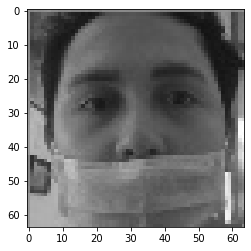

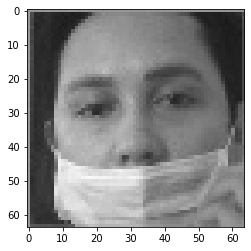

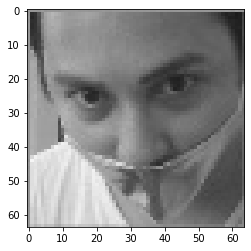

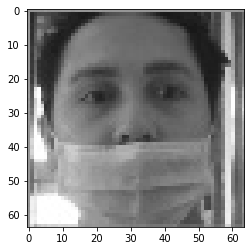

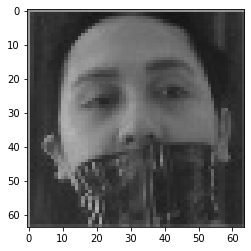

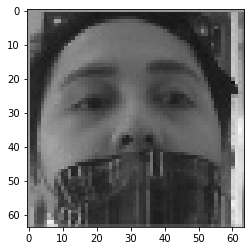

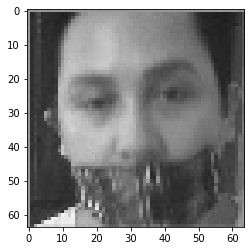

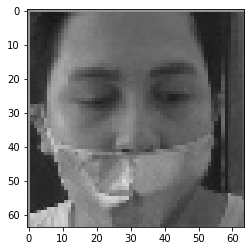

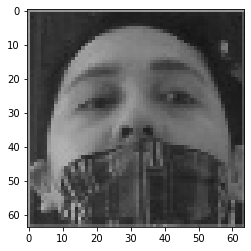

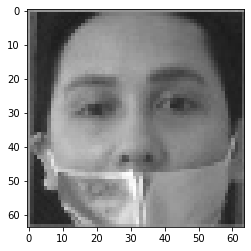

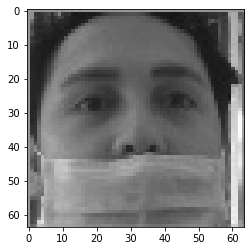

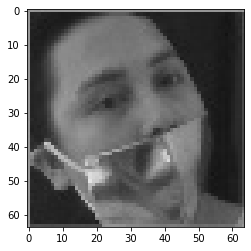

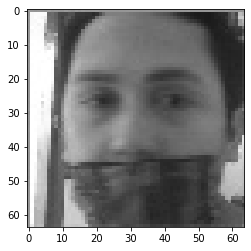

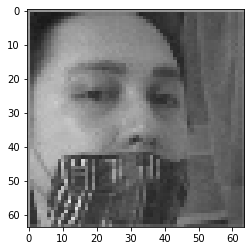

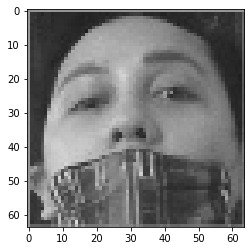

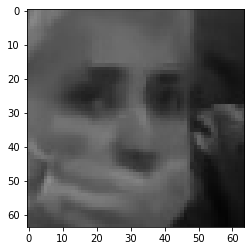

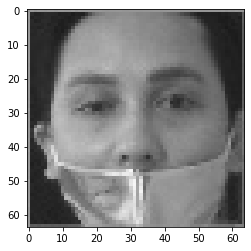

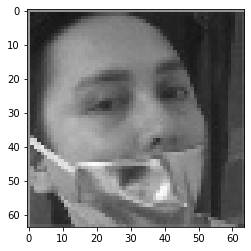

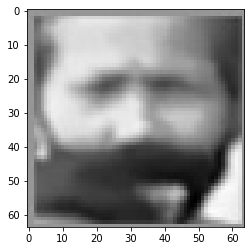

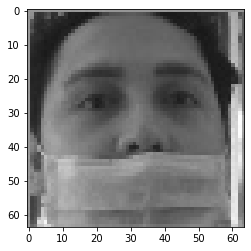

Total data: 20
partially_covered num: 0
fully_covered num: 20
not_covered num: 0



In [73]:
import glob
dir_path = '/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing'

partially_covered_test_path = '/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/partially_covered'
fully_covered_test_path = '/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/fully_covered'
not_covered_test_path = '/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered'

cur_testing_path = partially_covered_test_path
class_list = ['fully_covered', 'not_covered', 'partially_covered']
totalData, fully_covered_Num, not_covered_Num, partially_covered_Num = 0, 0, 0, 0

def get_files(path):
    if os.path.isdir(path):
        files = glob.glob(os.path.join(path, '*'))
    elif path.find('*') > 0:
        files.glob.glob(path)
    else:
        files = [path]
    files = [f for f in files if f.endswith('.jpg')]
    if not len(files):
        sys.exit('no images found')
    return files


for f in get_files(cur_testing_path):
    img = image.load_img(f, target_size = (64,64))
    plt.imshow(img)
    plt.show()
    totalData = totalData + 1
    x= image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images=np.vstack([x])
    pred = model.predict(images)[0]
    largest = 0
    largest_index = 0
    for i in range(3):  
        if pred[i] > largest:
            largest = pred[i]
            largest_index = i
        
    if class_list[largest_index] == 'fully_covered':
        fully_covered_Num = fully_covered_Num + 1
    elif class_list[largest_index] == 'not_covered':
        not_covered_Num = not_covered_Num + 1
    elif class_list[largest_index] == 'partially_covered':
        partially_covered_Num = partially_covered_Num + 1
        
print('Total data: {}\npartially_covered num: {}\nfully_covered num: {}\nnot_covered num: {}\n'.format(totalData, partially_covered_Num, fully_covered_Num, not_covered_Num))

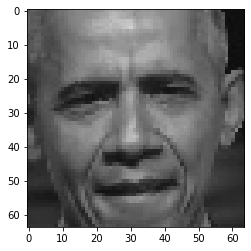

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zdusbzjt.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


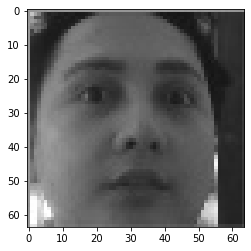

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zspcxuhz.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


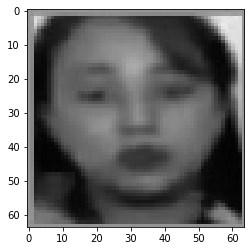

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xqhgxnug.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


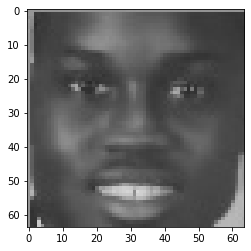

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yvxlroeh.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


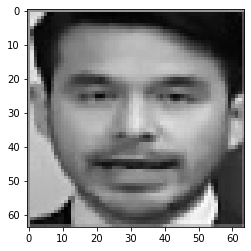

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yyqpdarm.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


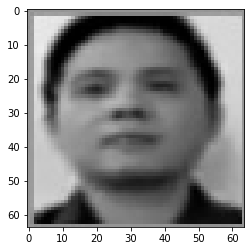

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ynldpgid.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


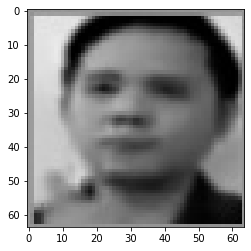

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xznhymub.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


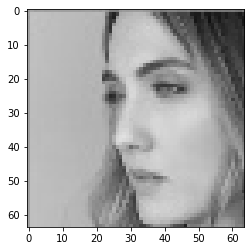

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yoexrsnq.jpg
  0.831  not_covered
  0.169  fully_covered
  0.000  partially_covered


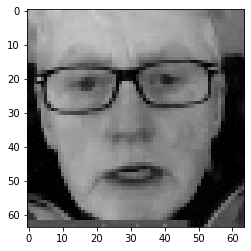

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ylfodnzc.jpg
  1.000  fully_covered
  0.000  partially_covered
  0.000  not_covered


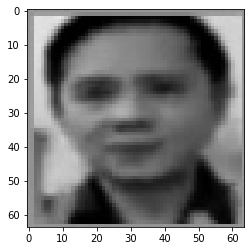

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ydphkbkf.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


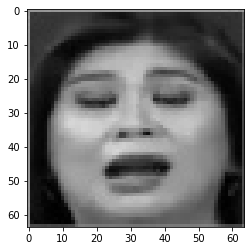

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zirrmsac.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


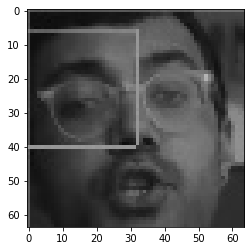

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ykksepwi.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


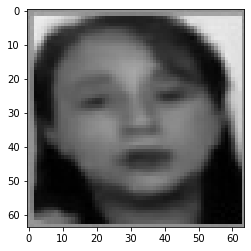

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yltzcssa.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


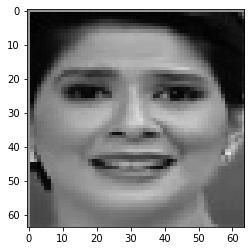

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xjohxhts.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


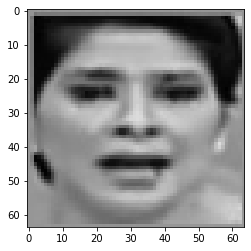

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zwgfsdpa.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


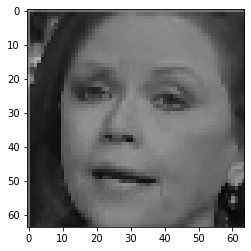

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zyoojing.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


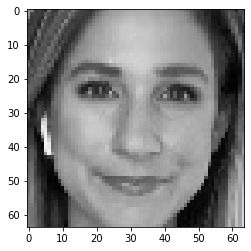

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxesubni.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


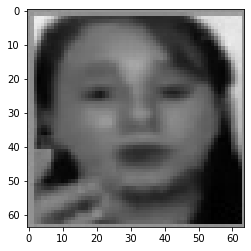

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zqgyzjuj.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


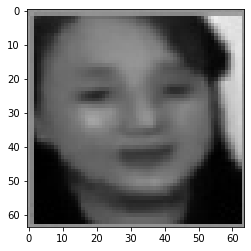

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xeygqqre.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


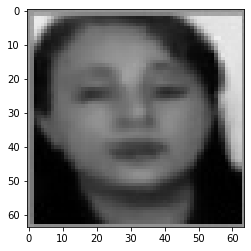

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yyzamigt.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


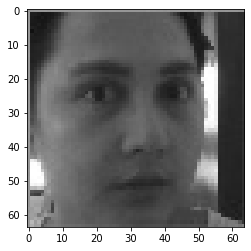

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yldlqeon.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


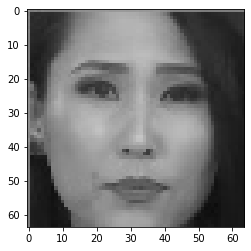

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxhxxpbk.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


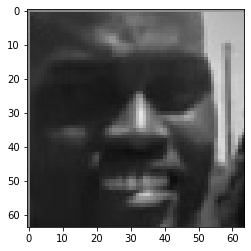

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xnvpaxmt.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


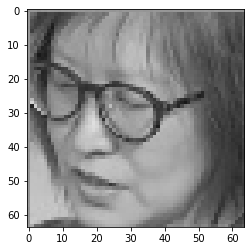

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yqlkekab.jpg
  1.000  fully_covered
  0.000  partially_covered
  0.000  not_covered


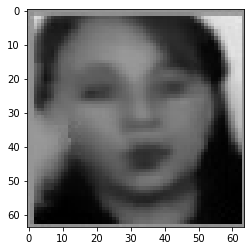

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ydbezqou.jpg
  0.940  not_covered
  0.060  fully_covered
  0.000  partially_covered


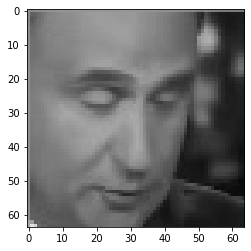

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zjafokzu.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


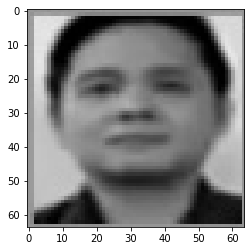

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zfsxustk.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


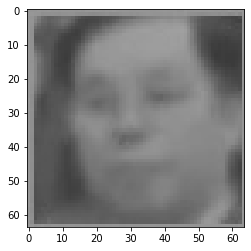

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xxqebsit.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


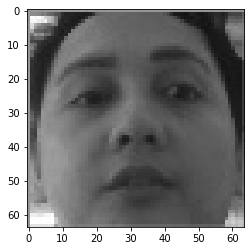

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yzlpydjb.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


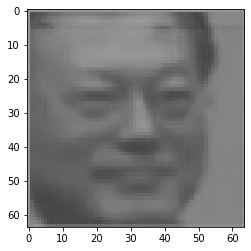

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yqigxqiu.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


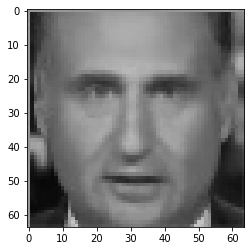

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zvjfzgaa.jpg
  0.987  not_covered
  0.013  fully_covered
  0.000  partially_covered


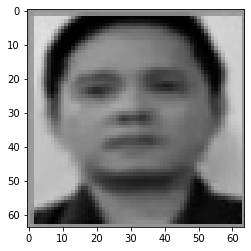

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xxrfsrmi.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


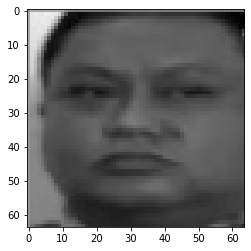

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ykendxdr.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


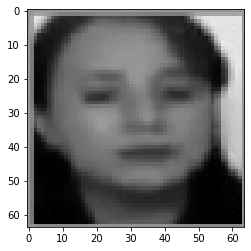

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xlbfgtff.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


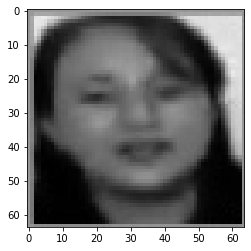

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zptaoysu.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


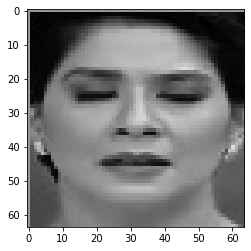

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yrrksjpv.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


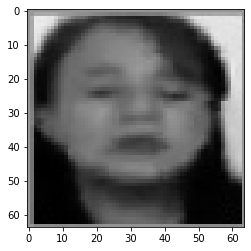

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xwkixjcn.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


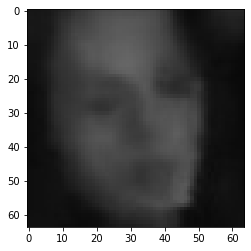

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxheayuq.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


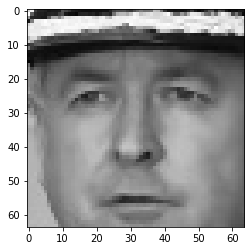

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yfgdrbwx.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


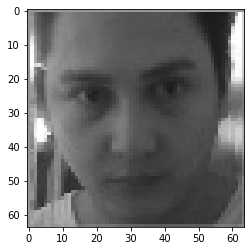

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zdpvfcmr.jpg
  1.000  fully_covered
  0.000  partially_covered
  0.000  not_covered


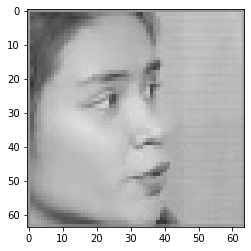

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xohbfmns.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


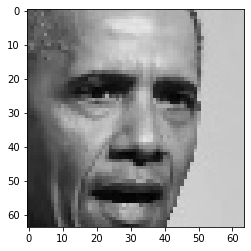

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zjccaerw.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


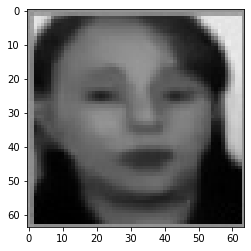

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xrbnylqo.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


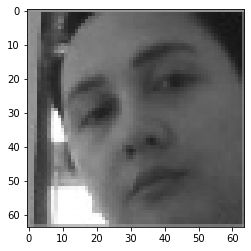

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xtvggfyl.jpg
  1.000  fully_covered
  0.000  partially_covered
  0.000  not_covered


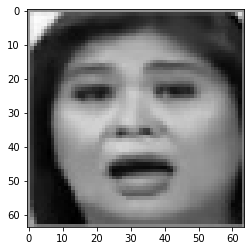

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcmspoui.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


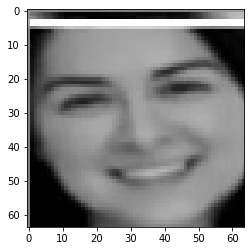

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ygioinie.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


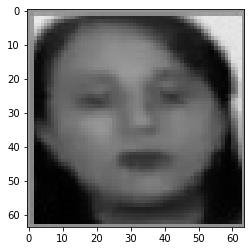

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zxslcvjl.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


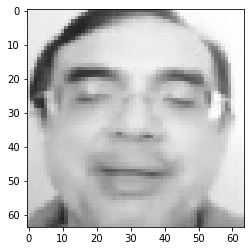

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zyvzoyxx.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


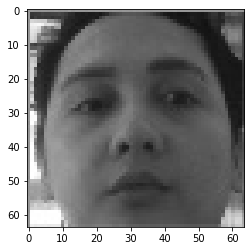

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zllnugks.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


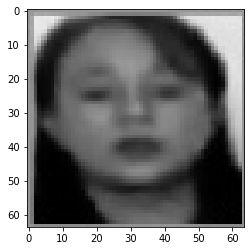

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zpiudvpg.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


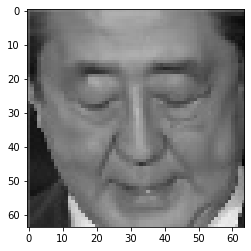

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xktqchzu.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


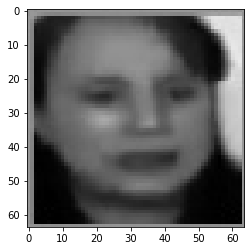

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zomnnicd.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


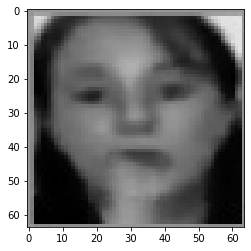

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xkppllpt.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


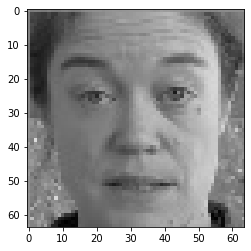

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zwaojudg.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


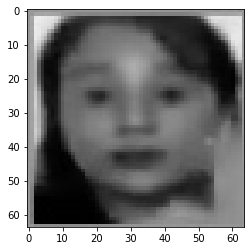

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zjyekucd.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


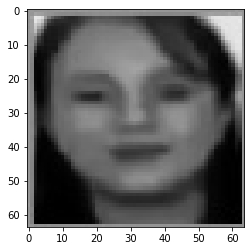

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ypybrjqc.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


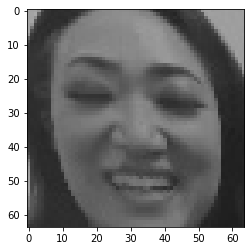

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yytoigee.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


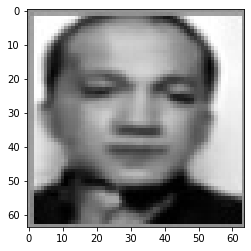

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ytnxahbu.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


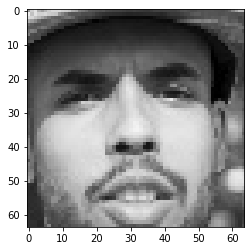

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xpzoxofp.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


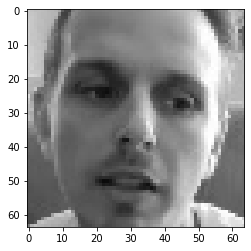

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ycbfeswz.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


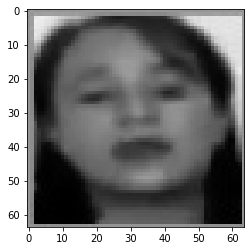

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xnxysrey.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


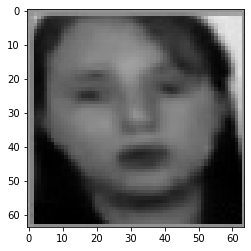

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xwgylqqd.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


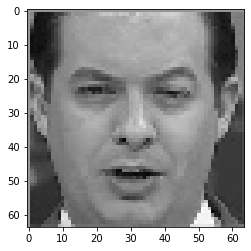

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yofjuvhj.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


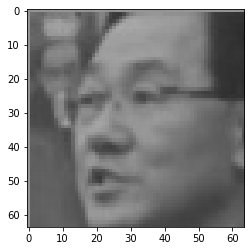

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yejipnpc.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


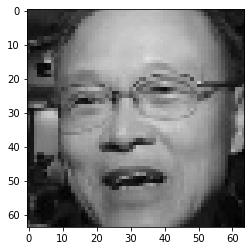

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xjpysask.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


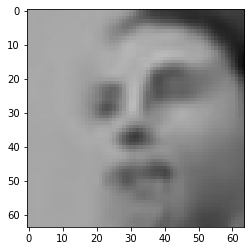

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zdypxoqc.jpg
  0.810  fully_covered
  0.190  not_covered
  0.000  partially_covered


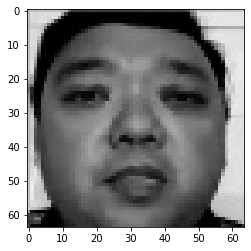

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xtvglifm.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


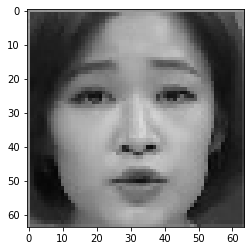

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yvhrzuwe.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


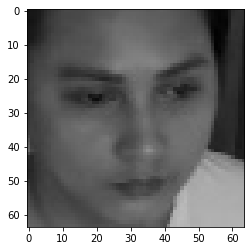

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zrgymnsl.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


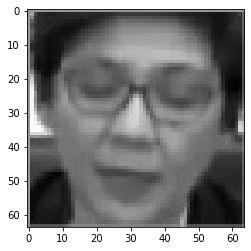

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yaehdpie.jpg
  0.854  fully_covered
  0.146  not_covered
  0.000  partially_covered


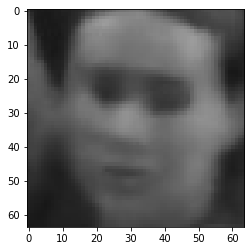

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zaoodwee.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


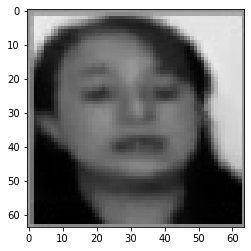

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yylefbks.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


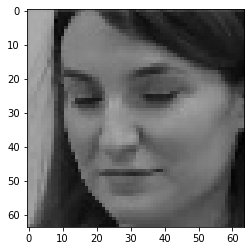

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ywpveyzm.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


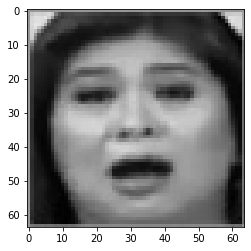

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yhnrrrgj.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


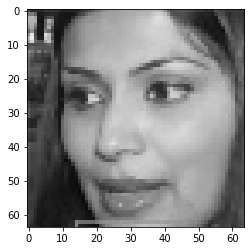

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zkwfaath.jpg
  0.996  fully_covered
  0.004  not_covered
  0.000  partially_covered


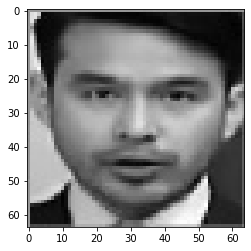

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zosdcjpz.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


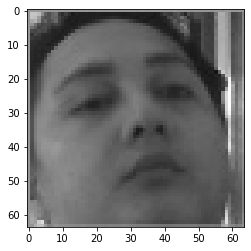

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxmrefbq.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


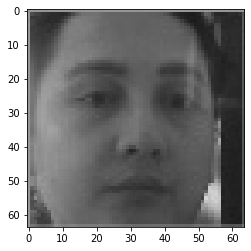

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zafnnmap.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


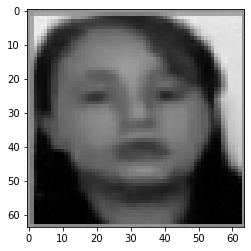

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxmyuist.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


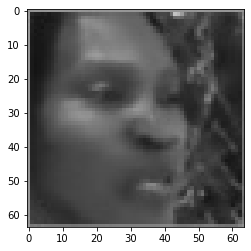

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zmjcuhoi.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


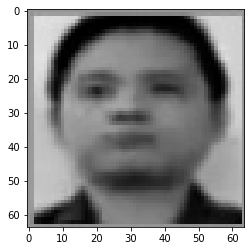

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ypqmzofk.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


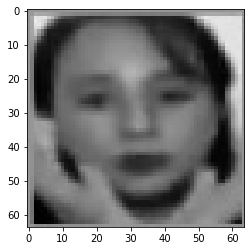

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zfpfgtzi.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


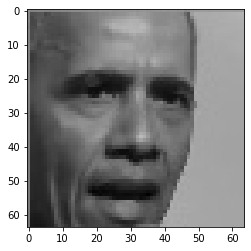

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xtgutzlv.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


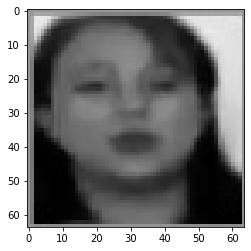

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxwmizbz.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


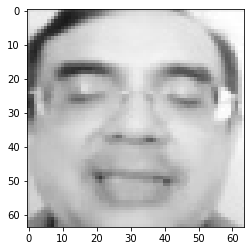

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ywgjclur.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


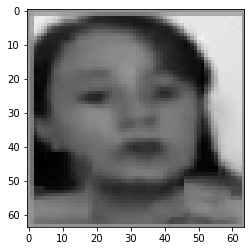

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xoocqudn.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


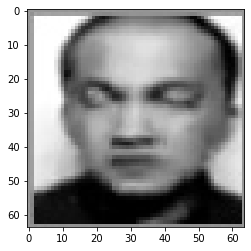

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zhdlegql.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


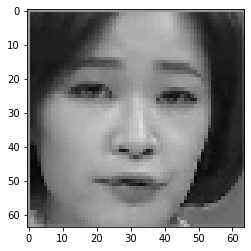

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xxtiwesj.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


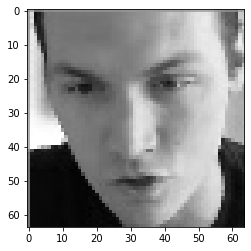

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xvpoiswc.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


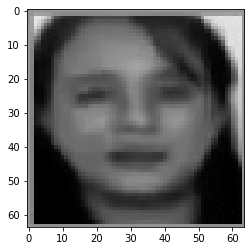

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xwdkjgrv.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


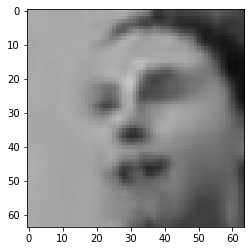

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yqdomjqj.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


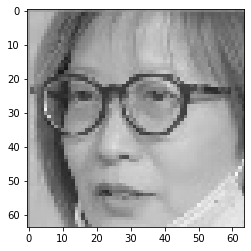

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zarhkybt.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


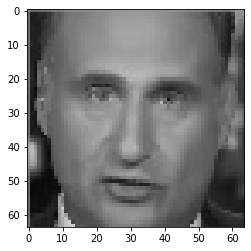

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xesbgguc.jpg
  0.999  fully_covered
  0.001  not_covered
  0.000  partially_covered


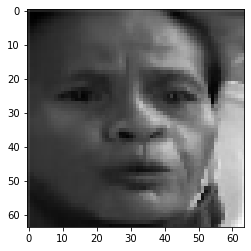

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zddkcmyr.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


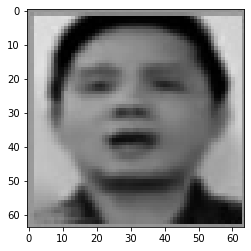

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xludaxad.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


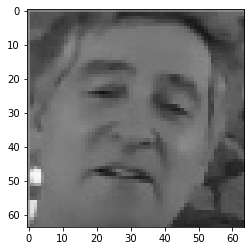

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xjlztbgj.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


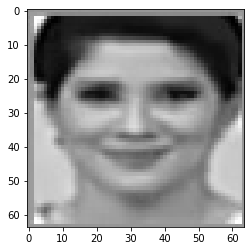

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yyttqlob.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


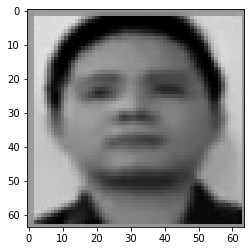

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xuhpiecq.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


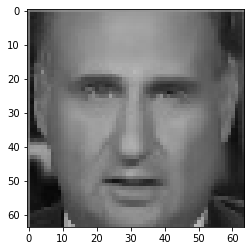

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zynbtkld.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


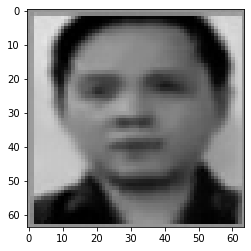

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yhibywbp.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


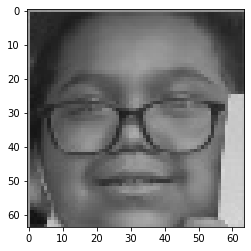

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xvaklome.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


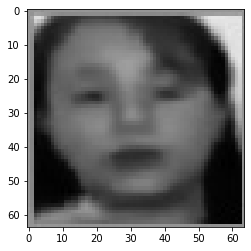

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xyyslrmv.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


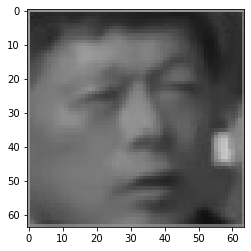

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yrgegkvz.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


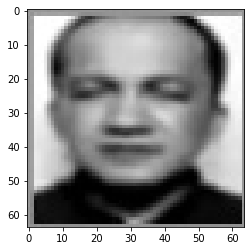

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xuztgblv.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


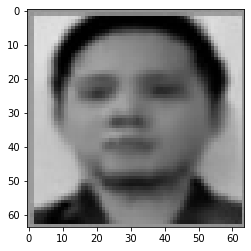

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zunnayht.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


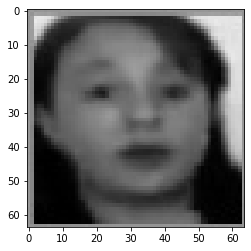

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yawdgrbd.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


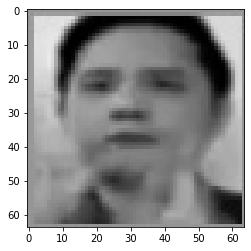

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ysokxmir.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


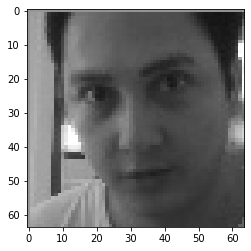

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yypwzeby.jpg
  1.000  fully_covered
  0.000  partially_covered
  0.000  not_covered


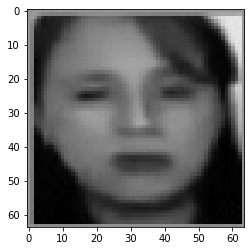

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xxtvufnu.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


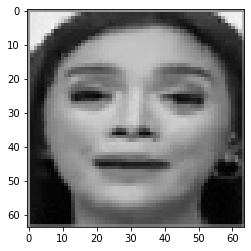

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ydianyev.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


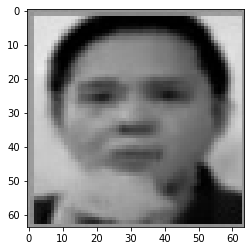

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xwhhrpoe.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


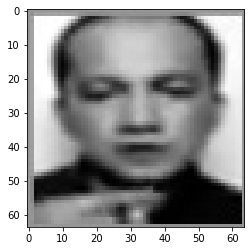

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zbansgai.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


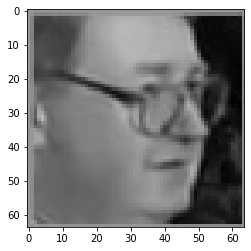

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xkkoayoz.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


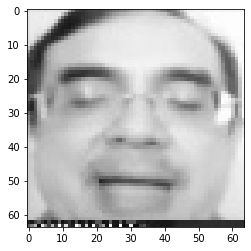

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yvocjbhe.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


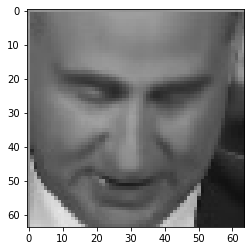

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xqfthqkd.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


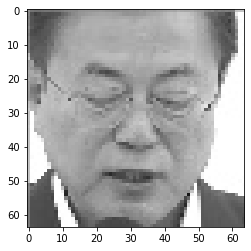

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zdgmjqyi.jpg
  0.995  not_covered
  0.005  fully_covered
  0.000  partially_covered


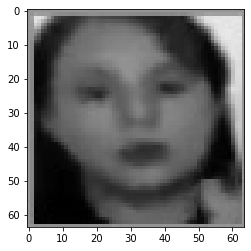

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xqhtrpbf.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


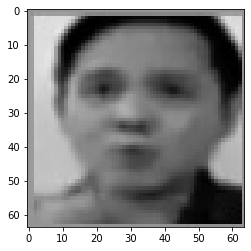

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ytqbqxmx.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


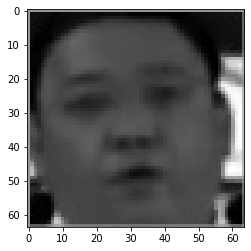

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xiscmegs.jpg
  0.975  not_covered
  0.025  fully_covered
  0.000  partially_covered


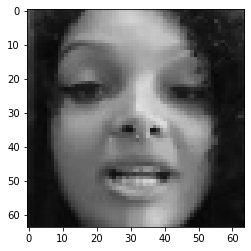

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yeanpayn.jpg
  0.763  not_covered
  0.237  fully_covered
  0.000  partially_covered


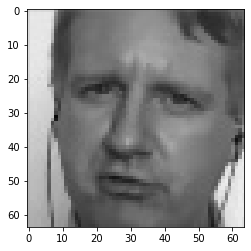

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xingkqca.jpg
  0.999  fully_covered
  0.001  not_covered
  0.000  partially_covered


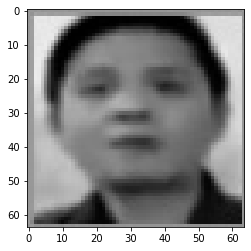

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zldoefgh.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


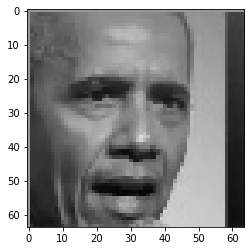

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yqdrnwpq.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


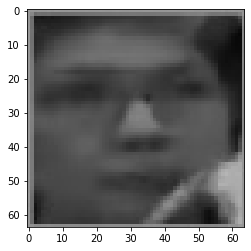

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yhcenksz.jpg
  0.995  fully_covered
  0.005  not_covered
  0.000  partially_covered


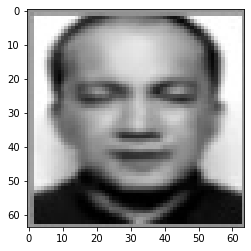

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zpwlzdzs.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


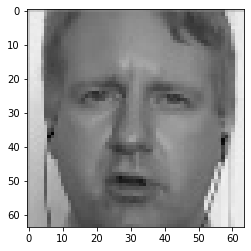

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zvjomxnp.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


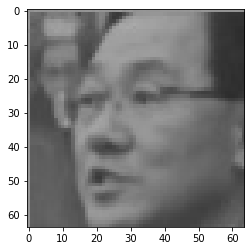

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zosocpyu.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


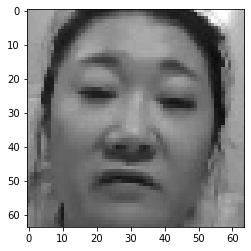

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zduodjcd.jpg
  0.962  not_covered
  0.038  fully_covered
  0.000  partially_covered


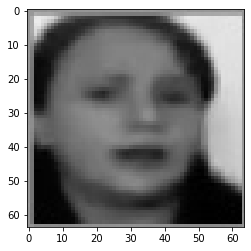

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xryzkfdm.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


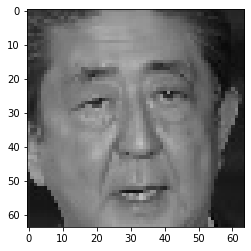

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zlhizxvq.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


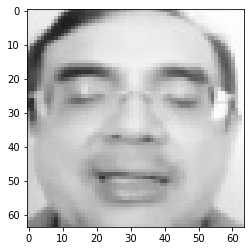

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xkawrafa.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


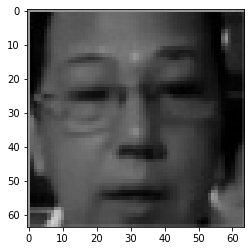

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xtvlrgom.jpg
  0.813  not_covered
  0.187  fully_covered
  0.000  partially_covered


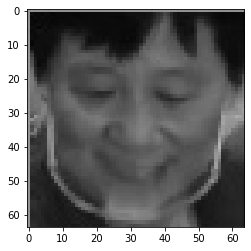

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zvtfhffc.jpg
  0.703  fully_covered
  0.297  not_covered
  0.000  partially_covered


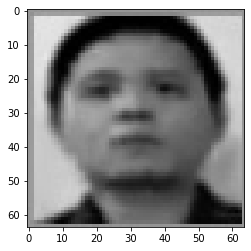

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xjyfebsd.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


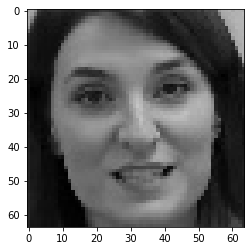

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zdaegpiy.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


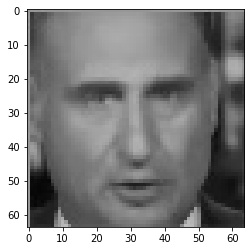

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xigtxzpt.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


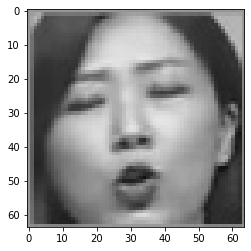

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxvfovfo.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


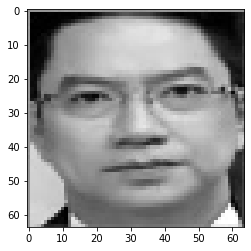

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ysykwdcm.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


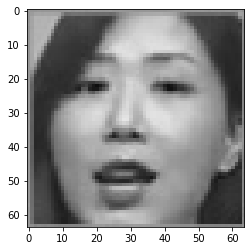

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yrdzhxrj.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


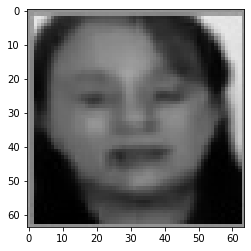

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yfcvyvjg.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


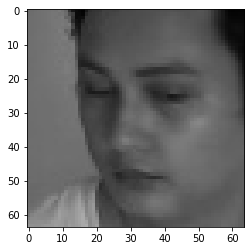

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxfgibhu.jpg
  0.558  fully_covered
  0.442  not_covered
  0.000  partially_covered


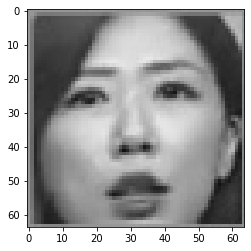

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zmwenntx.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


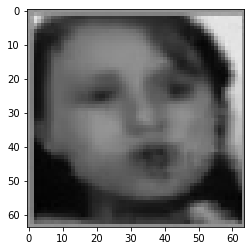

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zjizmgws.jpg
  0.997  not_covered
  0.003  fully_covered
  0.000  partially_covered


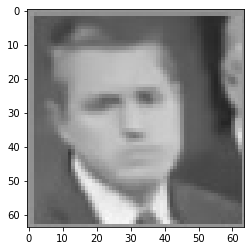

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zvbqyaar.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


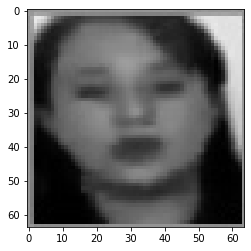

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcsuukbf.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


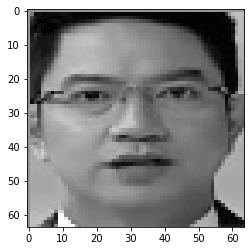

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zdoonatz.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


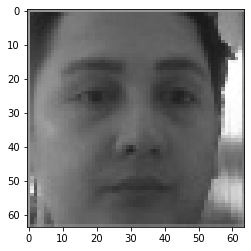

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yctevdef.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


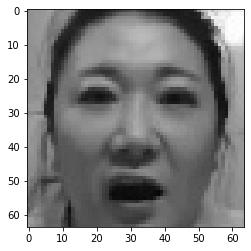

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zkfnjnyw.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


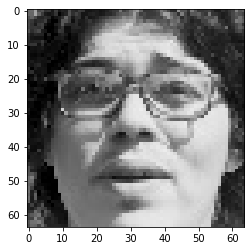

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yjunhlxl.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


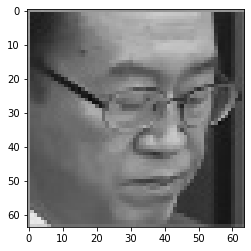

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xgalbkmg.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


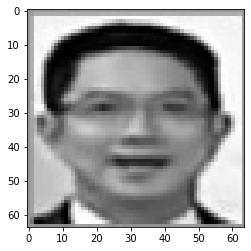

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zxwqspsq.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


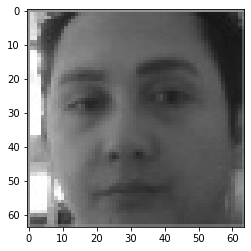

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yluwfphk.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


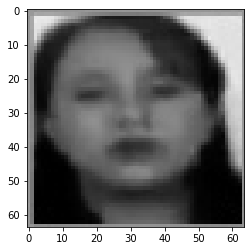

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yblovmim.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


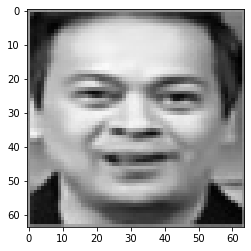

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zlstjuyz.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


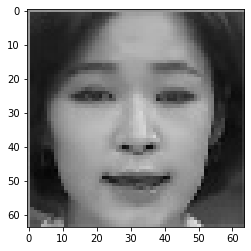

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zobgfnqx.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


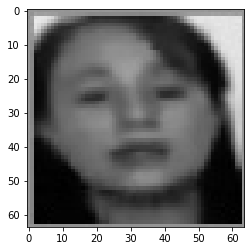

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xuirmkap.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


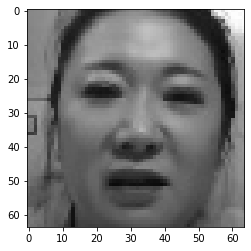

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xjapobas.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


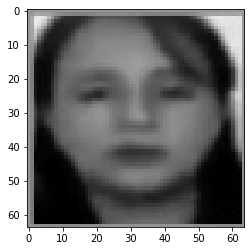

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yyagdluh.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


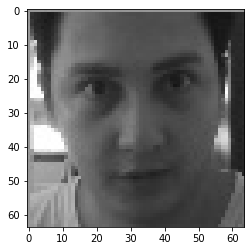

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xzutfthk.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


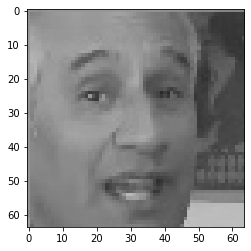

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zumfszyg.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


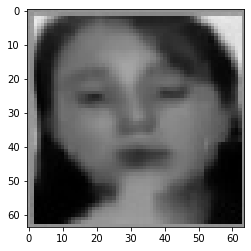

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yylfsren.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


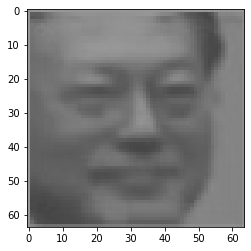

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xzwvcort.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


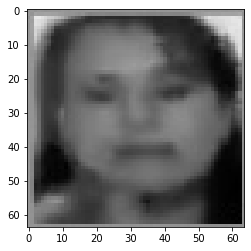

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zbiqtxvq.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


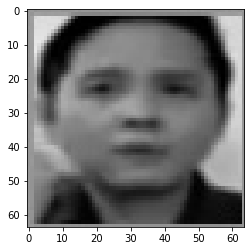

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zjzytfmw.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


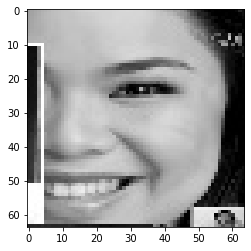

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yoibjavs.jpg
  1.000  fully_covered
  0.000  partially_covered
  0.000  not_covered


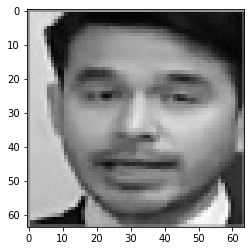

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxyvfhzl.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


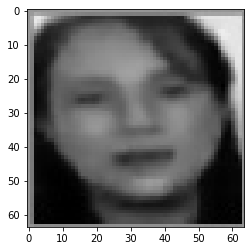

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ysvabbxc.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


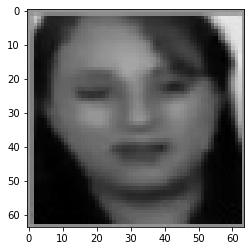

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zuhsfmgo.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


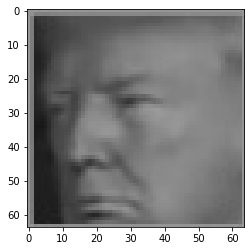

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ximawneq.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


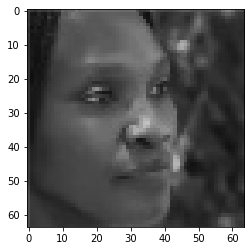

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ztdidezb.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


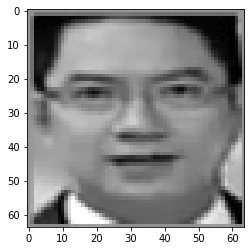

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yvvjtssw.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


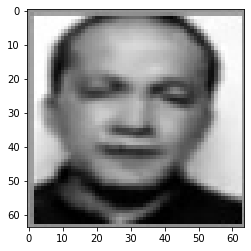

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xvagnvne.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


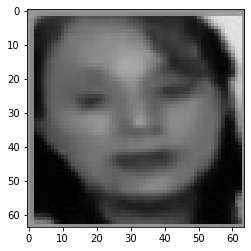

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yjqjxoxj.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


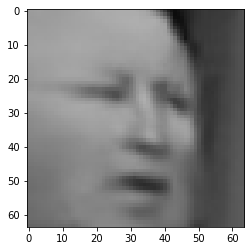

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zftclbxa.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


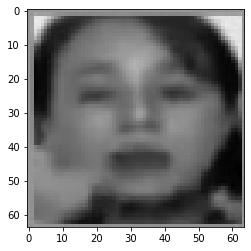

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xnxyuigg.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


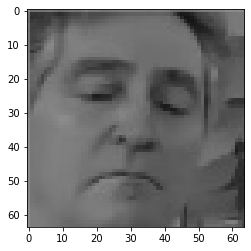

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ylwpxnkp.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


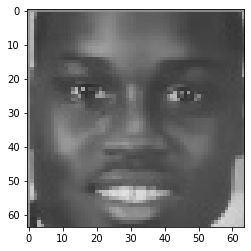

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zfdzuffi.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


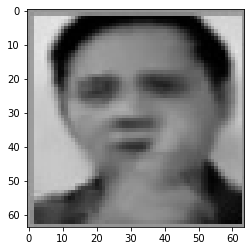

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ywcqhast.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


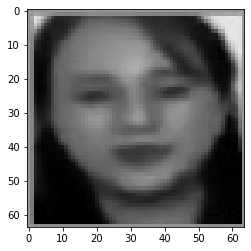

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zwccgjme.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


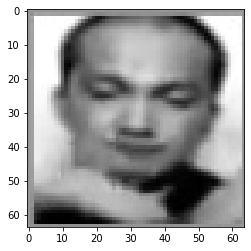

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xvtxxxfv.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


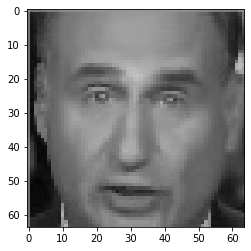

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zbiijfnz.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


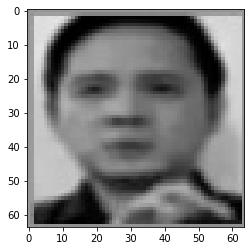

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xgjkedaj.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


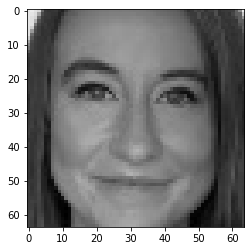

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yepauhmk.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


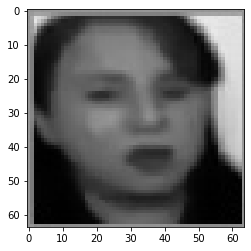

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ztffaqsm.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


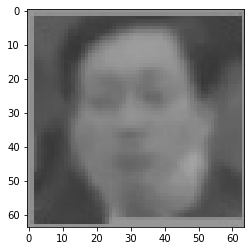

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yrheixtd.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


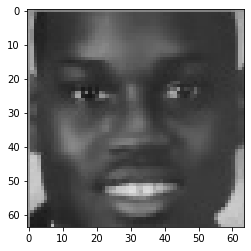

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ygncqilv.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


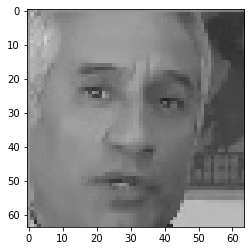

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xrsioljv.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


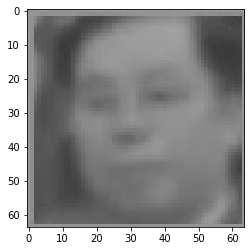

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ybmvvkht.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


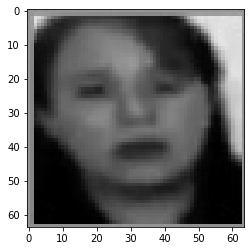

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yszjbwmn.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


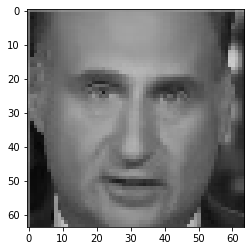

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zqwypjae.jpg
  0.976  fully_covered
  0.024  not_covered
  0.000  partially_covered


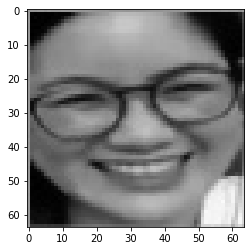

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yecxcgwc.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


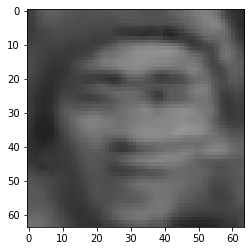

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ydhfbwct.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


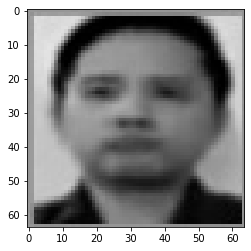

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yktoqeqg.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


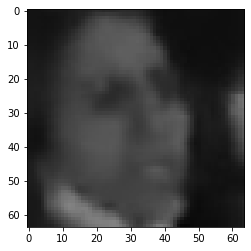

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/znrhylqf.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


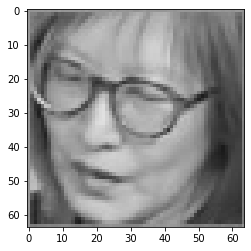

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xlkmvlru.jpg
  1.000  fully_covered
  0.000  partially_covered
  0.000  not_covered


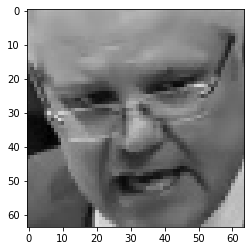

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zbiucwap.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


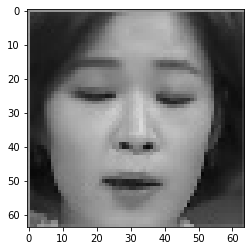

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yzbntcho.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


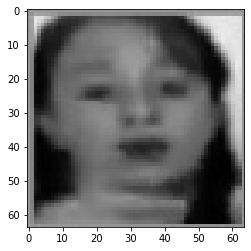

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yhdhrvqy.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


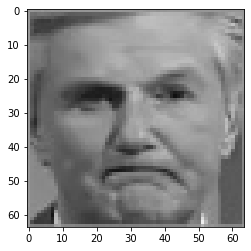

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yosfiwxp.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


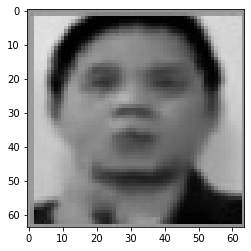

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yehxmyfe.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


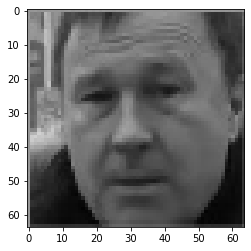

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yepsnakj.jpg
  0.991  not_covered
  0.009  fully_covered
  0.000  partially_covered


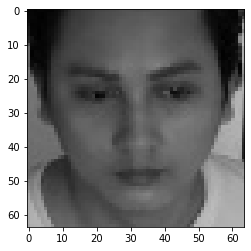

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zigxdyvt.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


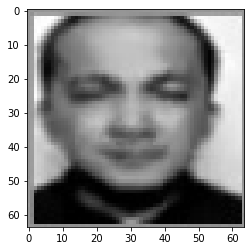

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xlhgkdgq.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


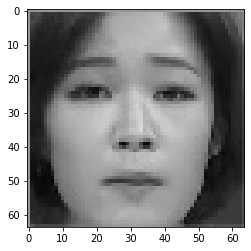

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ywabiktj.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


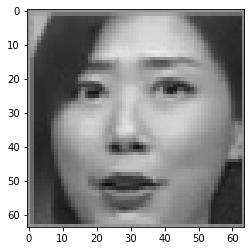

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yatymmcs.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


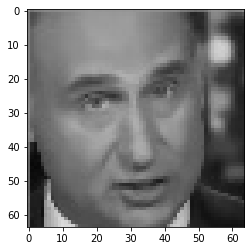

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ykmgpnld.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


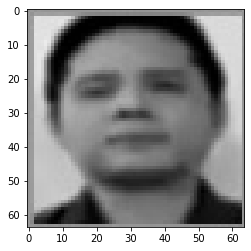

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xtqhueec.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


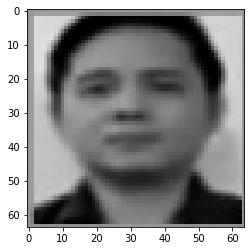

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zpsmvumb.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


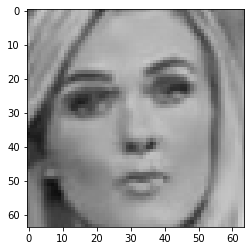

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xvnshmiw.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


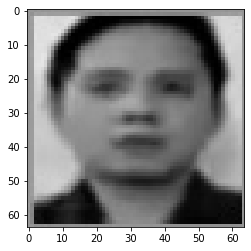

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xrzutsjk.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


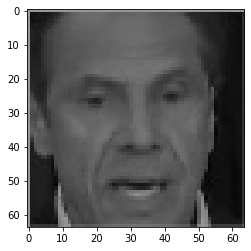

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xwbtvyzc.jpg
  0.996  not_covered
  0.004  fully_covered
  0.000  partially_covered


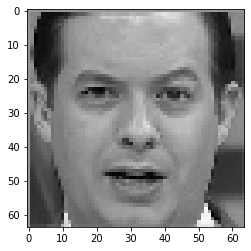

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xzezjctw.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


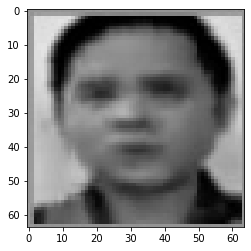

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zxqggaff.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


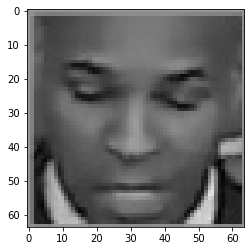

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zstsswzo.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


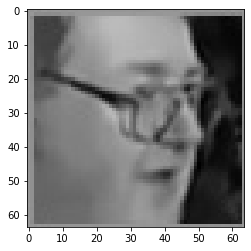

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yqihjasv.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


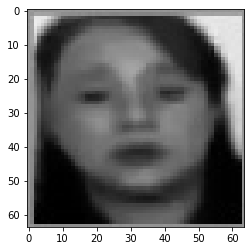

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xjeinrwv.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


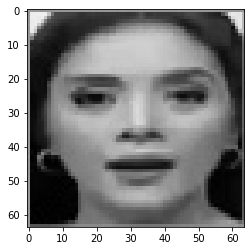

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xfexkgqj.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


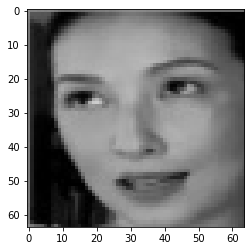

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yucnrihv.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


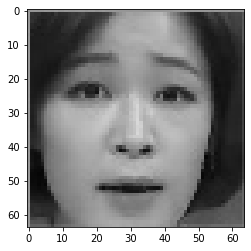

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xywezuci.jpg
  0.994  fully_covered
  0.006  not_covered
  0.000  partially_covered


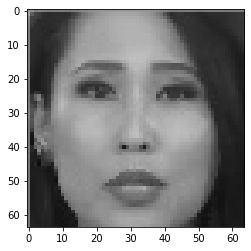

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zddfdagc.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


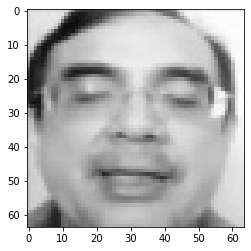

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zdwqcqut.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


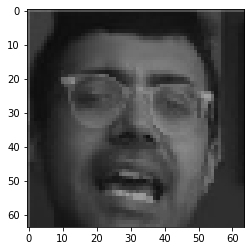

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ycphkabd.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


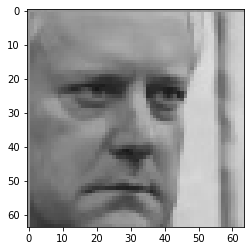

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xjgurvyg.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


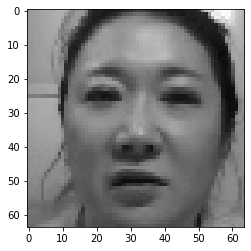

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yapjdyly.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


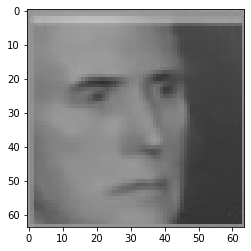

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xluaqfjw.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


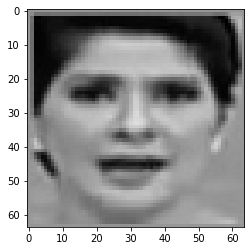

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yhmktbqb.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


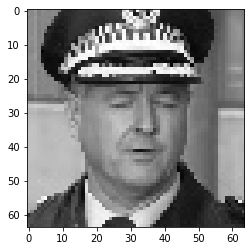

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ydktokxy.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


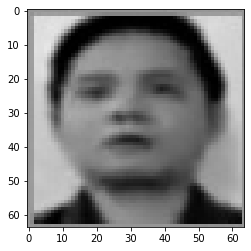

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zeecqfyq.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


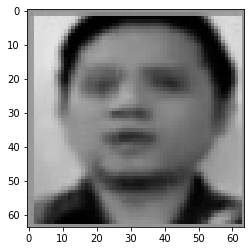

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zpiebese.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


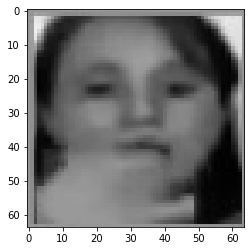

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ygbwvtqh.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


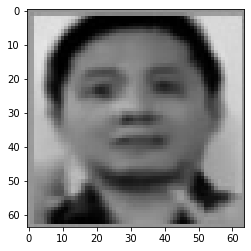

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xuzixdwh.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


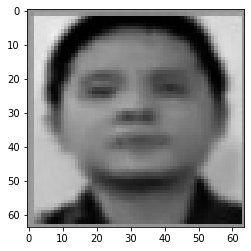

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xyuxbbjv.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


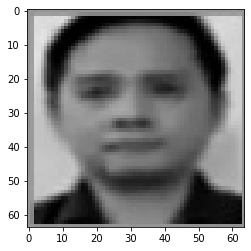

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xoimuxnp.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


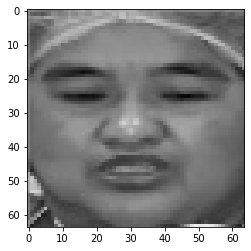

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zjrqckqh.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


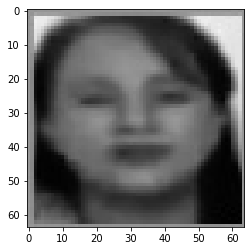

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ztqxdxzq.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


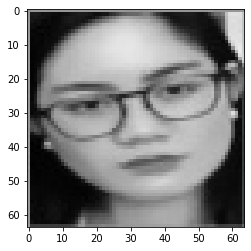

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xkzwcfah.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


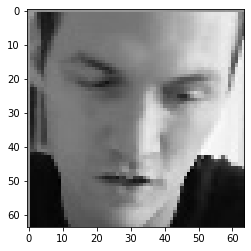

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xytukzyr.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


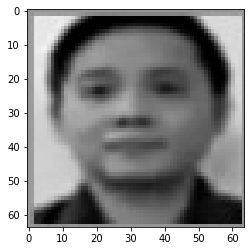

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcffkvuo.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


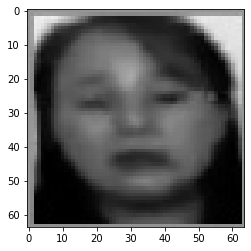

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ymfmwzlf.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


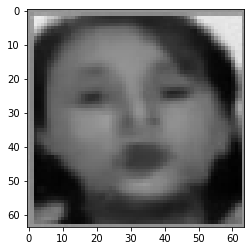

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zzmidrdc.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


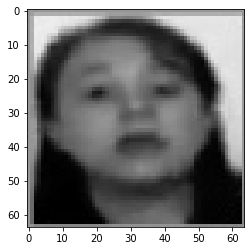

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ztaoertf.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


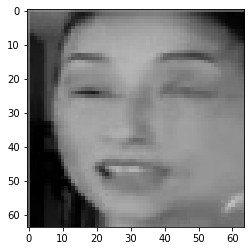

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zfwfisqe.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


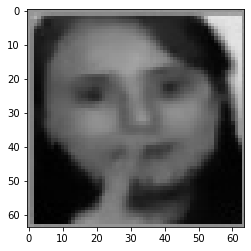

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xmmiflvn.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


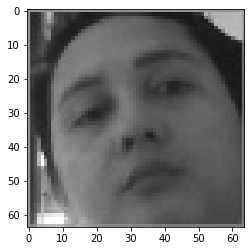

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ztwezgaj.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


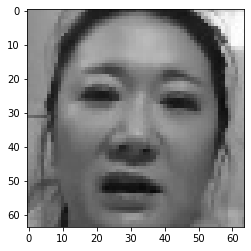

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zuewkyux.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


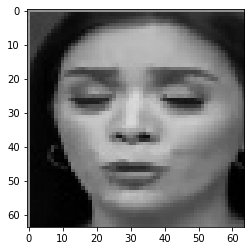

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xwurmwdv.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


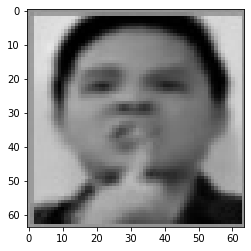

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcxguapn.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


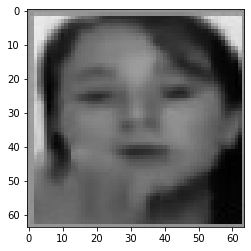

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxevlnla.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


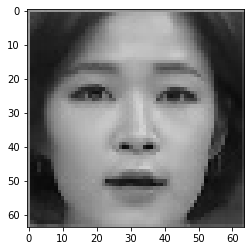

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xppbseub.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


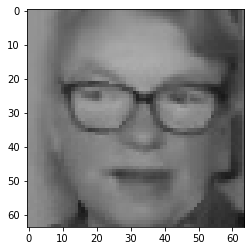

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zahncrze.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


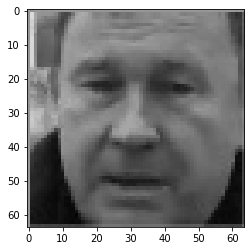

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zqmjbpfz.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


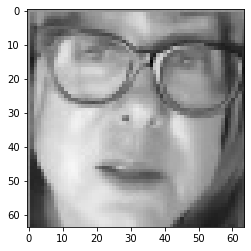

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yxsthrca.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


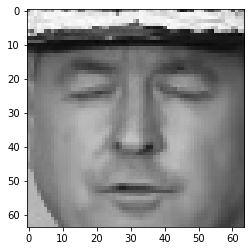

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ymxdixkb.jpg
  0.761  not_covered
  0.239  fully_covered
  0.000  partially_covered


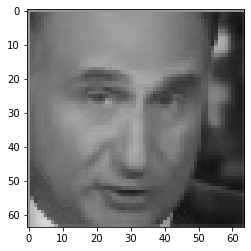

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xrkdfnnf.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


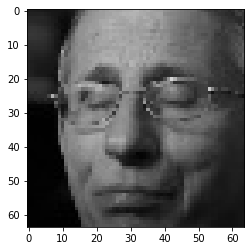

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ydyvjrta.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


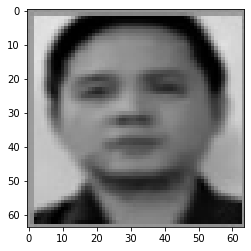

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zixydfcv.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


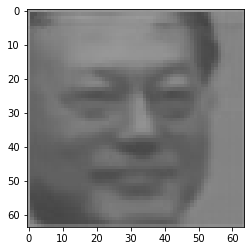

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xlnfhouc.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


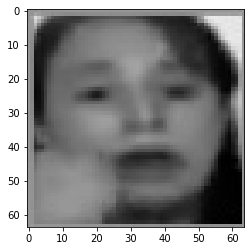

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/znxdvxhw.jpg
  0.529  fully_covered
  0.471  not_covered
  0.000  partially_covered


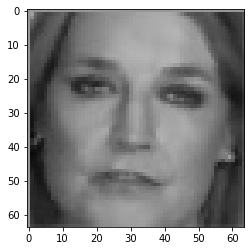

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yiuomdze.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


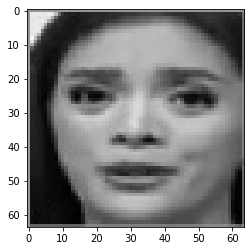

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zbmyvsiy.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


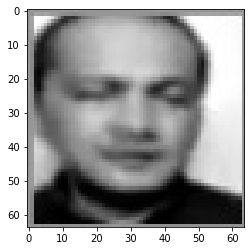

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zgrpigyl.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


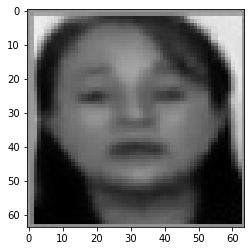

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ysejqkkn.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


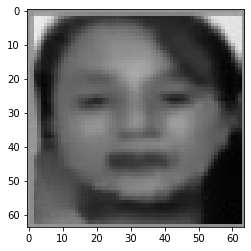

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xzhyhknc.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


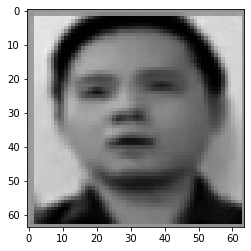

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yhgnnrux.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


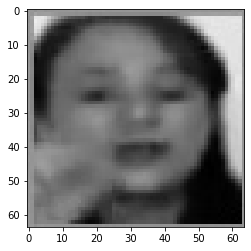

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xwuqwrkk.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


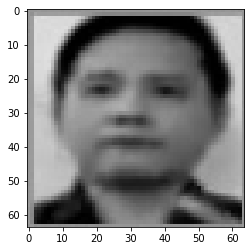

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ypgdwlqk.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


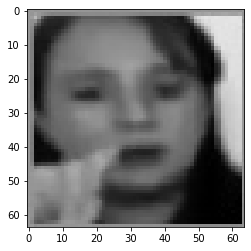

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yfkigsfg.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


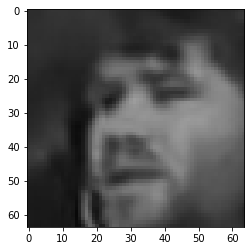

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zdutghvm.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


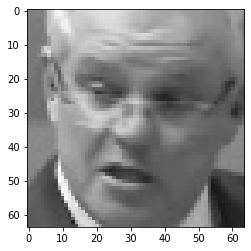

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xocpgnwi.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


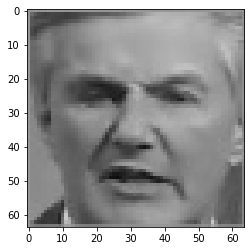

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xsichmak.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


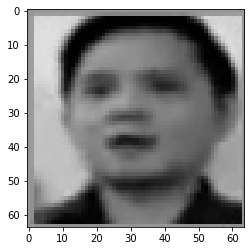

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xyqugdqd.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


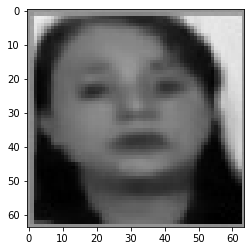

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zeksmndw.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


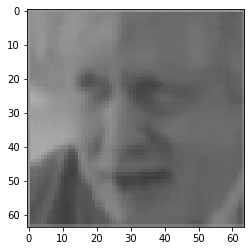

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yiqfyphf.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


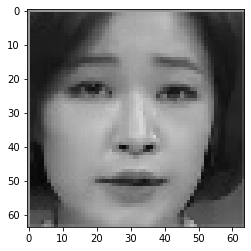

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zkmgegaj.jpg
  0.797  not_covered
  0.203  fully_covered
  0.000  partially_covered


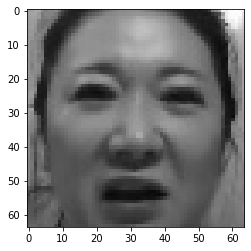

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ygdaabks.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


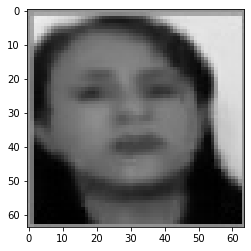

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xiiprtct.jpg
  0.992  fully_covered
  0.008  not_covered
  0.000  partially_covered


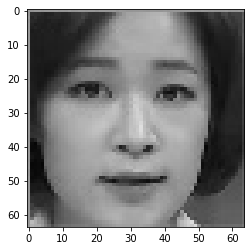

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcjgfxlx.jpg
  0.977  not_covered
  0.023  fully_covered
  0.000  partially_covered


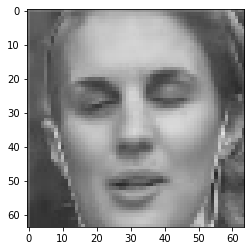

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zkjiafbn.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


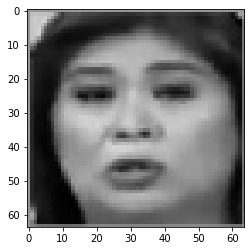

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ziuwudzu.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


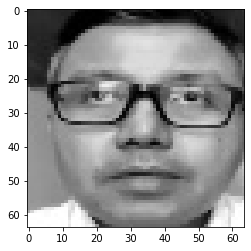

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xkaqspdi.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


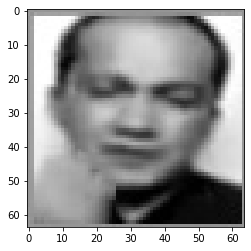

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yrqexsxi.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


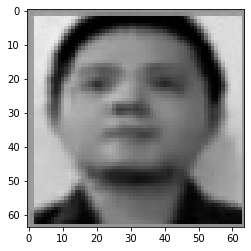

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zqihnevg.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


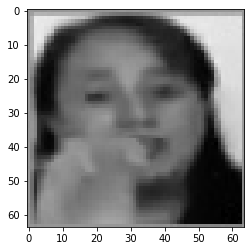

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xnlafdvy.jpg
  0.515  not_covered
  0.485  fully_covered
  0.000  partially_covered


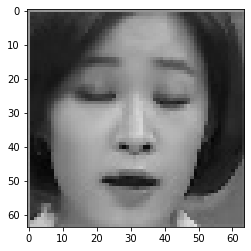

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xiotrjma.jpg
  0.999  not_covered
  0.001  fully_covered
  0.000  partially_covered


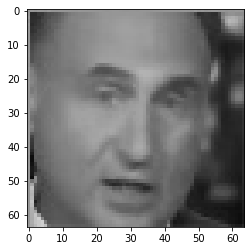

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yzaefruo.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


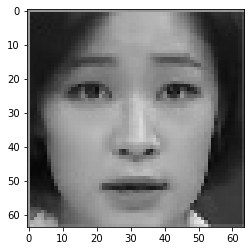

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xhnggsgg.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


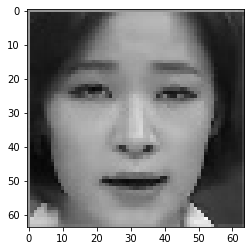

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zilmrziw.jpg
  0.942  fully_covered
  0.058  not_covered
  0.000  partially_covered


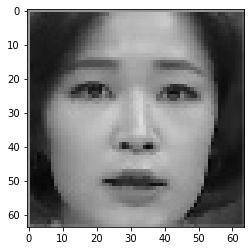

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xmeflyhb.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


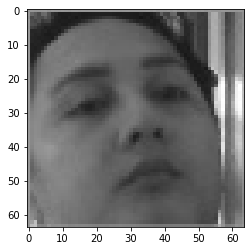

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yiugydux.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


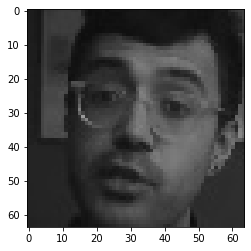

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/znjgwyjw.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


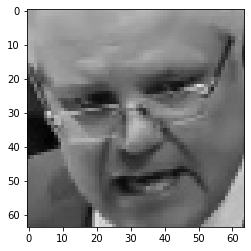

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zickulhd.jpg
  0.994  fully_covered
  0.006  not_covered
  0.000  partially_covered


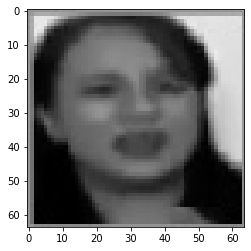

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xzrxdnfs.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


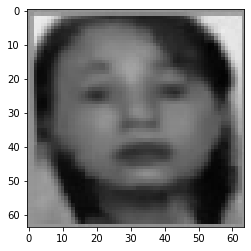

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yghitldl.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


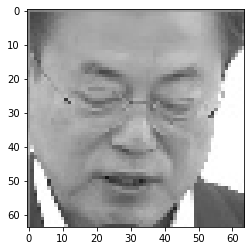

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zbkkgqiy.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


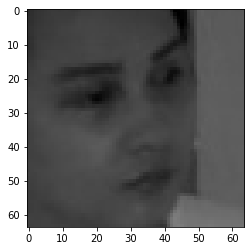

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zbqcwuop.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


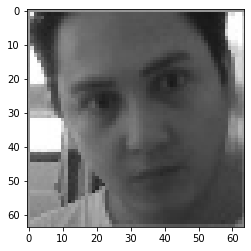

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zzaaxjnw.jpg
  1.000  fully_covered
  0.000  partially_covered
  0.000  not_covered


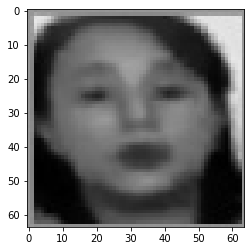

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zwvqqjrd.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


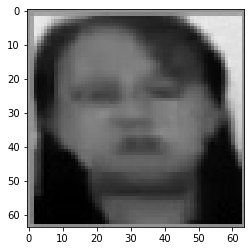

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zszlktca.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


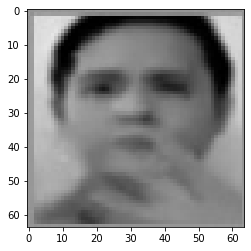

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yqcgwznn.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


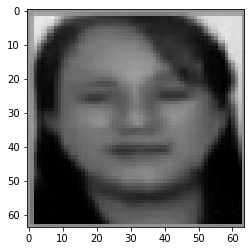

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yixtgone.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


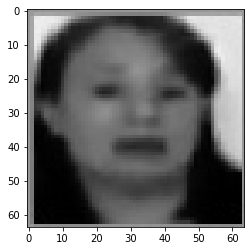

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xhsardkw.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


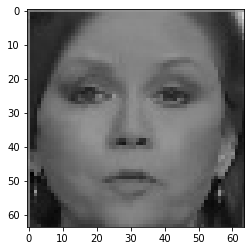

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xpyjvvbe.jpg
  0.951  fully_covered
  0.049  not_covered
  0.000  partially_covered


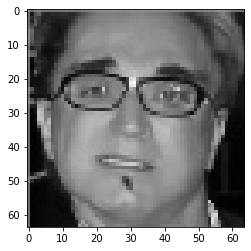

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zrgjdphm.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


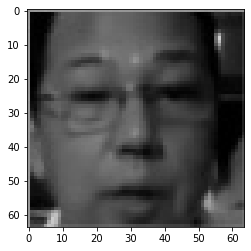

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zqodbomk.jpg
  0.994  fully_covered
  0.006  not_covered
  0.000  partially_covered


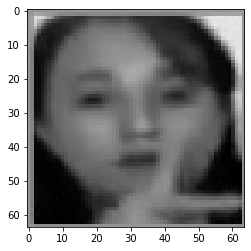

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yoacaygu.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


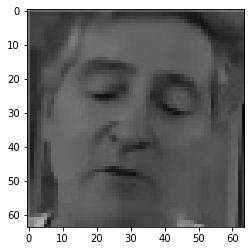

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ybzuqfkm.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


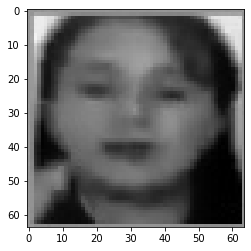

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ybwalwbp.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


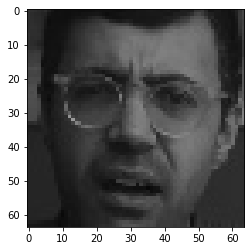

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zqhmytvk.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


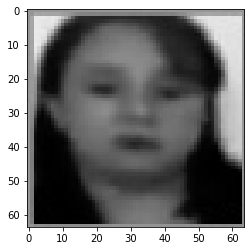

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zoxaclhm.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


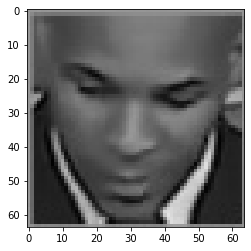

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xnifadzw.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


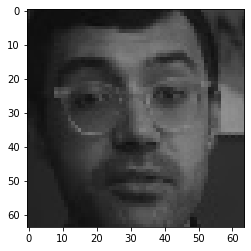

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zskethcf.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


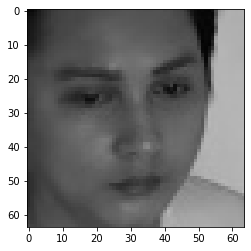

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yzvzjuvh.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


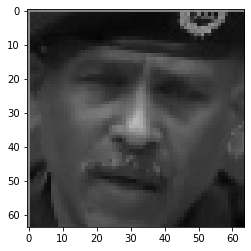

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zqfrjwys.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


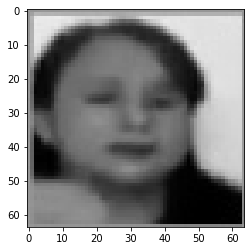

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcuqefls.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


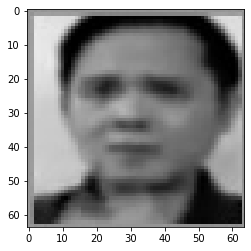

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ybbffees.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


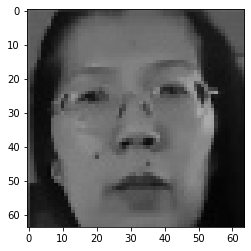

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ztsrvjdr.jpg
  0.998  not_covered
  0.002  fully_covered
  0.000  partially_covered


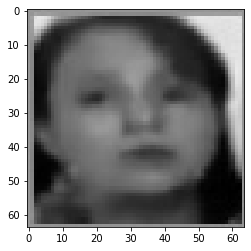

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zylpfnfx.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


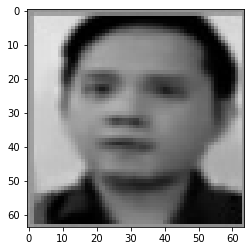

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yhmqfhll.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


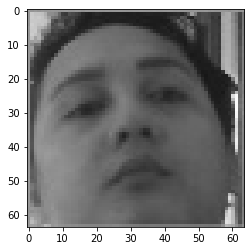

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yiiamxtl.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


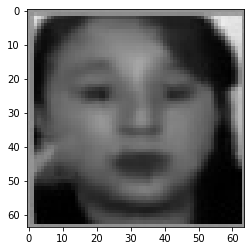

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ycwzueys.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


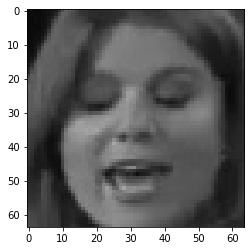

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xkeqyxik.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


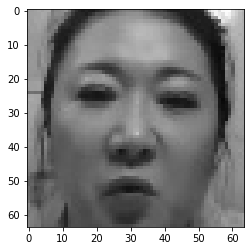

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yidumxqt.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


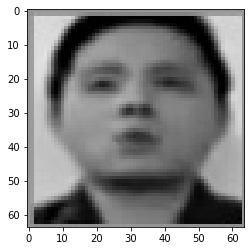

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xggvnkpk.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


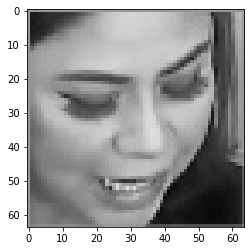

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ysgspfjk.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


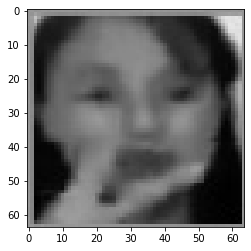

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yuaamite.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


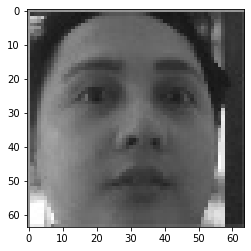

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xmrbrzjn.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


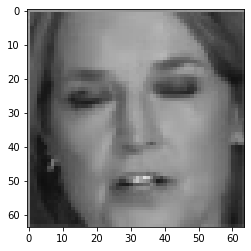

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zjwulvkn.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


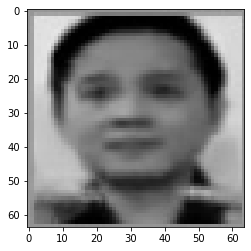

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ybrxmdhu.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


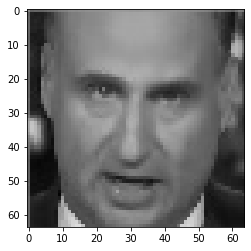

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xvfjdcpx.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


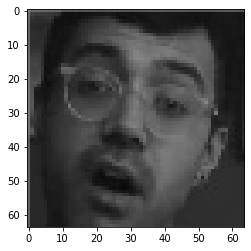

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xxlwafno.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


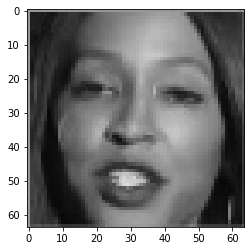

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zywexwlu.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


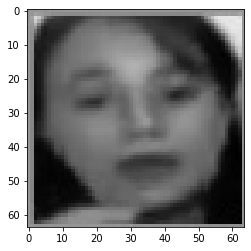

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ygcgiaog.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


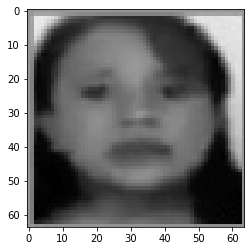

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yegbavmj.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


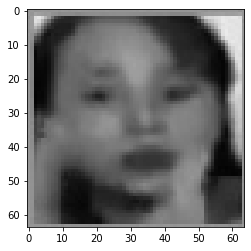

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xjnirzys.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


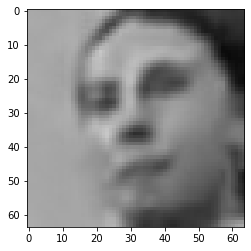

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcfhrhlh.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


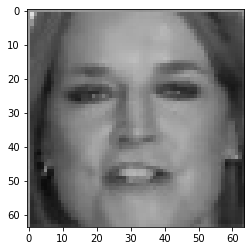

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yudpqfcq.jpg
  0.993  not_covered
  0.007  fully_covered
  0.000  partially_covered


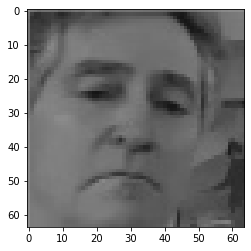

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yrfllgsn.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


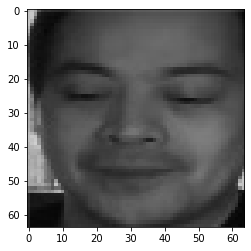

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zaovjbel.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


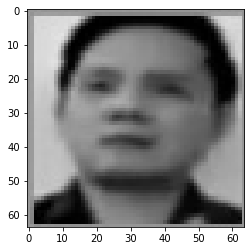

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xysfbgff.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


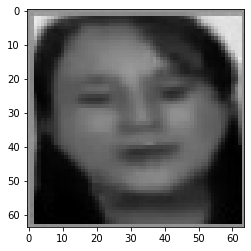

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcqhaiax.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


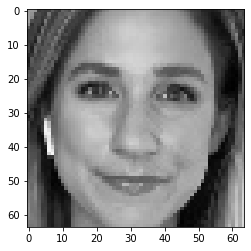

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zsqafvos.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


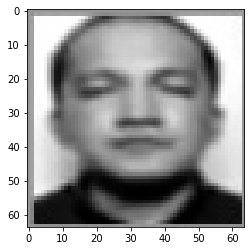

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zwbdqcqb.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


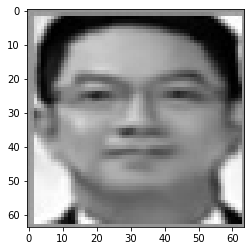

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zeynkihq.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


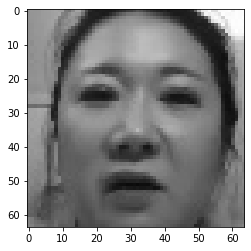

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zsyriwwo.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


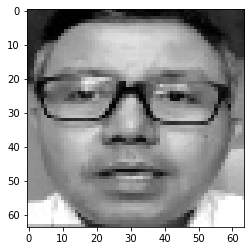

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xmjzsfwt.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


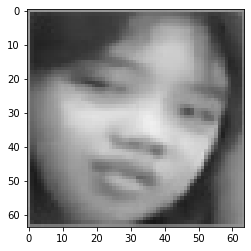

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xtmzwauz.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


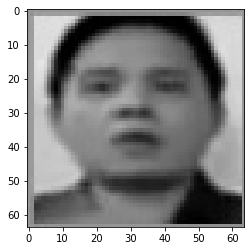

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xpbhppms.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


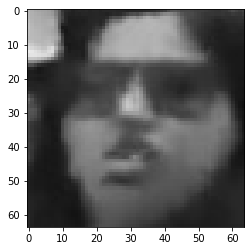

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xtgerajc.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


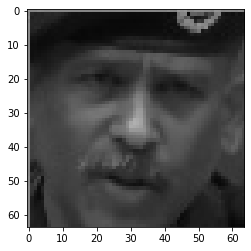

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ydjgfhpd.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


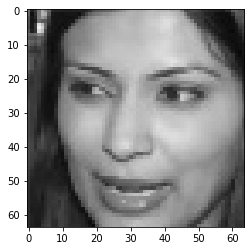

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xtziaqrg.jpg
  0.965  not_covered
  0.035  fully_covered
  0.000  partially_covered


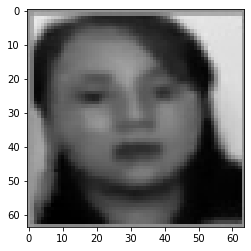

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xznxlxpj.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


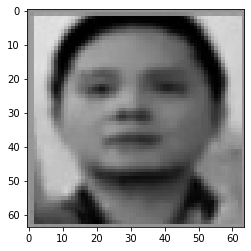

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yzbwdxrb.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


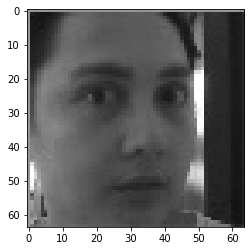

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zqzbilvf.jpg
  1.000  fully_covered
  0.000  partially_covered
  0.000  not_covered


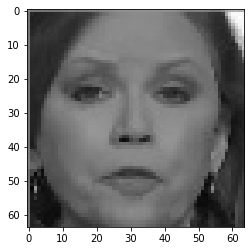

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zxeieefx.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


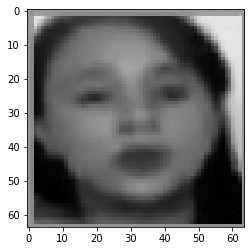

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yivphiav.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


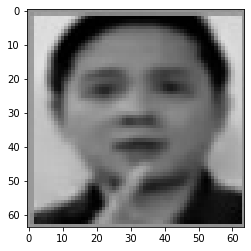

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ytbylftb.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


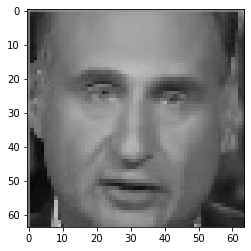

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xpmdirjh.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


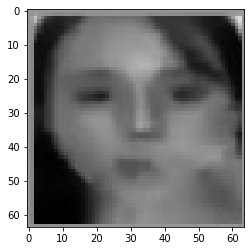

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zofstsjp.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


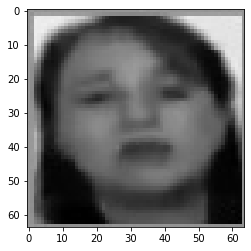

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xgavqtxn.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


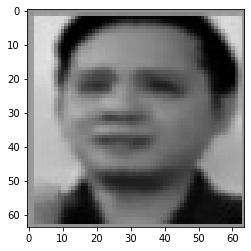

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xgaxycor.jpg
  0.999  not_covered
  0.001  fully_covered
  0.000  partially_covered


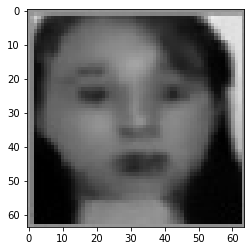

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zjsnncbz.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


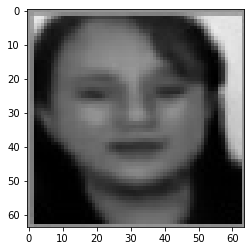

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zveioozw.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


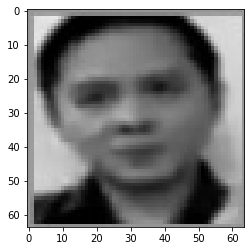

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcjnjlmg.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


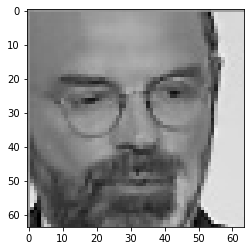

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xgnovttc.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


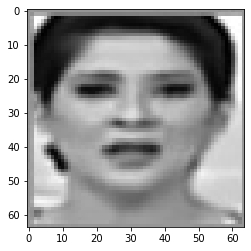

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ztdoplke.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


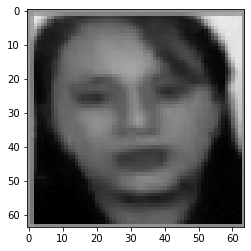

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zqqpapgp.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


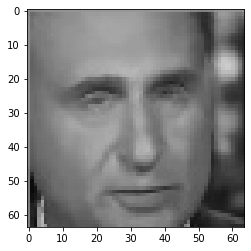

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zgyvudav.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


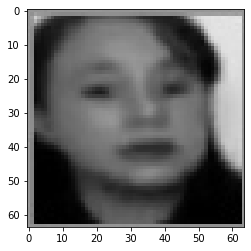

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xfmwonmy.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


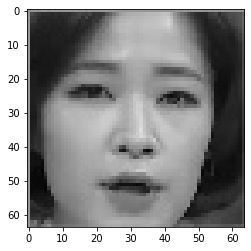

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcrglsxw.jpg
  0.998  not_covered
  0.002  fully_covered
  0.000  partially_covered


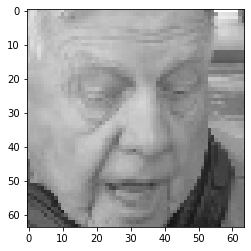

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xfbtvzje.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


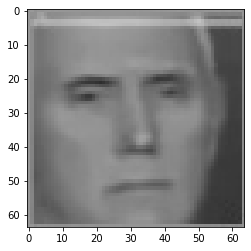

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zboylyrf.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


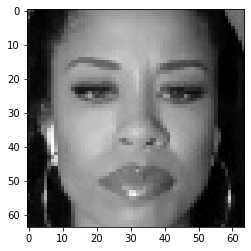

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xztsbkzl.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


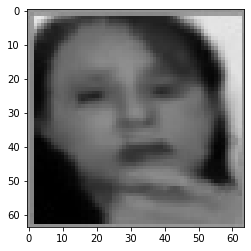

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yuhhwvjj.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


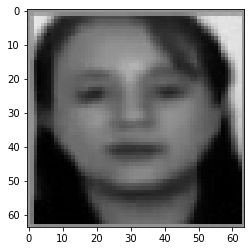

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zqthmceg.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


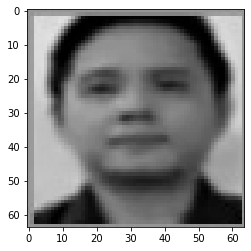

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zitakygx.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


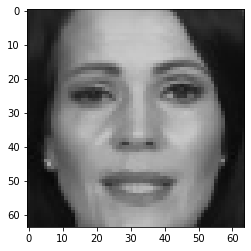

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xqrrnyak.jpg
  0.982  fully_covered
  0.018  not_covered
  0.000  partially_covered


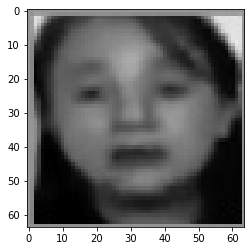

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zypdwqvt.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


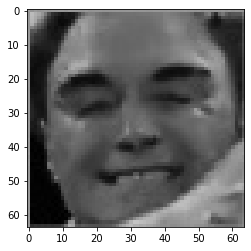

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yfvohiwq.jpg
  0.966  not_covered
  0.034  fully_covered
  0.000  partially_covered


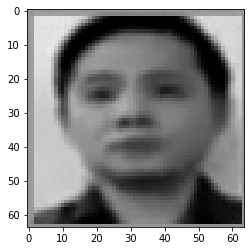

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zpttfjid.jpg
  1.000  not_covered
  0.000  partially_covered
  0.000  fully_covered


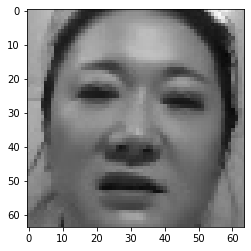

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xnqzmwhk.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


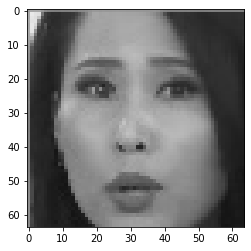

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xunkzzek.jpg
  0.656  not_covered
  0.344  fully_covered
  0.000  partially_covered


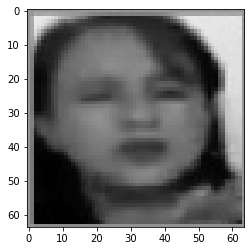

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zkgrtyxc.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


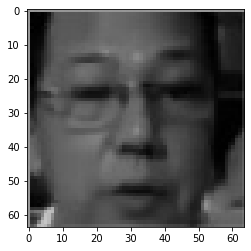

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ykcihhmt.jpg
  0.950  fully_covered
  0.050  not_covered
  0.000  partially_covered


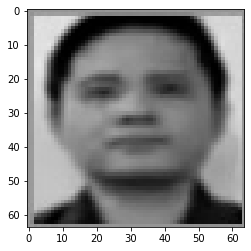

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xzwqjdae.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


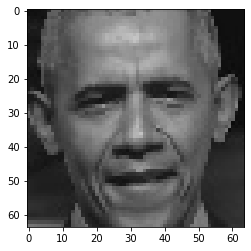

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zumlxpyy.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


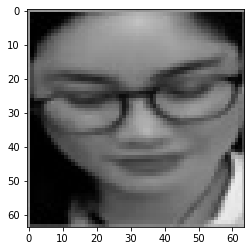

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xvliycao.jpg
  0.982  fully_covered
  0.018  not_covered
  0.000  partially_covered


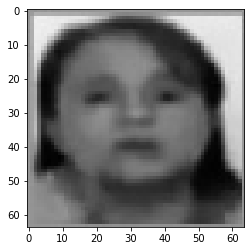

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xlmcqrso.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


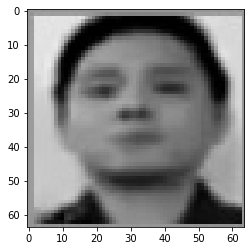

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yclreaie.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


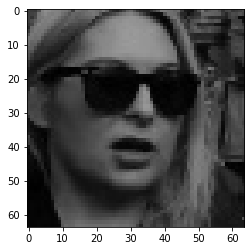

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ynuggwgs.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


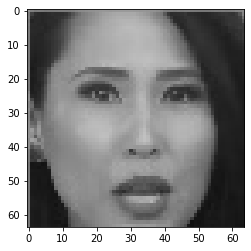

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xiwishpd.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


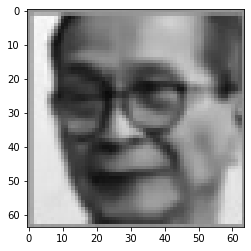

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zpgzurtn.jpg
  0.808  fully_covered
  0.192  not_covered
  0.000  partially_covered


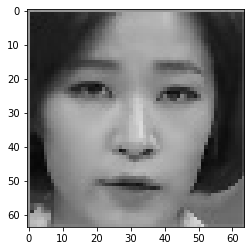

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zyvorfuy.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


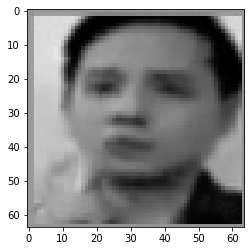

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yaegvarw.jpg
  0.529  not_covered
  0.471  fully_covered
  0.000  partially_covered


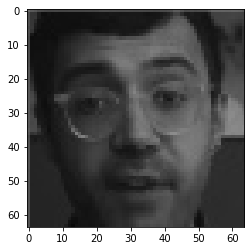

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zikryroe.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


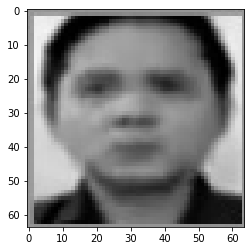

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/zcuescqo.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


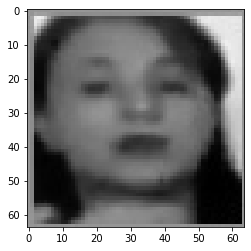

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/ysejkgte.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


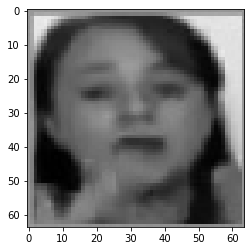

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xxnthwod.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


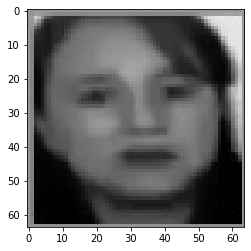

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/xvyfnkwn.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


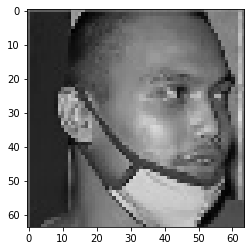

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yalgvooi.jpg
  1.000  fully_covered
  0.000  not_covered
  0.000  partially_covered


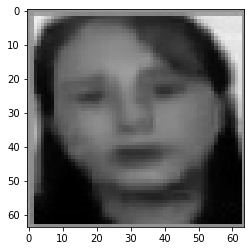

/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered/yqzplgcs.jpg
  1.000  not_covered
  0.000  fully_covered
  0.000  partially_covered


In [71]:
import glob
dir_path = '/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing'

partially_covered_test_path = '/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/partially_covered'
fully_covered_test_path = '/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/fully_covered'
not_covered_test_path = '/Users/yuexuanfu/Desktop/Deep Learning/final_project_dataset/dataset/testing/not_covered'

cur_testing_path = not_covered_test_path
class_list = ['fully_covered', 'not_covered', 'partially_covered']

def get_files(path):
    if os.path.isdir(path):
        files = glob.glob(os.path.join(path, '*'))
    elif path.find('*') > 0:
        files.glob.glob(path)
    else:
        files = [path]
    files = [f for f in files if f.endswith('.jpg')]
    if not len(files):
        sys.exit('no images found')
    return files


for f in get_files(cur_testing_path):
    img = image.load_img(f, target_size = (64,64))
    plt.imshow(img)
    plt.show()
    x= image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images=np.vstack([x])
    pred = model.predict(images)[0]
    top_inds = pred.argsort()[::-1][:3]
    print(f)
    for i in top_inds:
        print('  {:.3f}  {}'.format(pred[i], class_list[i]))
    